# Creating Convolutional Neural Networks Using Keras Framework

Reference Source: https://www.youtube.com/watch?v=NyYM6HnyX8I&list=PLBtyBPTlyC7tnpPDkp_E2JgIgIQSbugJL&index=15

In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [6]:
mnist_train_images.shape

(60000, 28, 28)

In [12]:
from keras import backend as K

if K.image_data_format() == "channels_first":
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28,28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
    input_shape = (1,28,28)
    
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28,28,1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28,28,1)
    input_shape = (28,28,1)

# normalizing data
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images = train_images/255
test_images = test_images/255

(10000, 28, 28, 1)

In [13]:
train_labels = keras.utils.to_categorical(mnist_train_labels,10)
test_labels = keras.utils.to_categorical(mnist_test_labels,10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


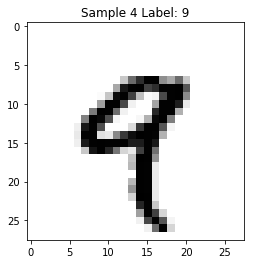

In [15]:
# taking this directly from reference article

import matplotlib.pyplot as plt

def display_sample(num):
    #print the one-hot array of this samples label
    print (train_labels[num])
    
    # print the label copnverted back to a number
    label = train_labels[num].argmax(axis=0)
    
    #reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample %d Label: %d' % (num,label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
    %matplotlib inline  

display_sample(4)    

# Building out the CNN

In [16]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(10, activation = 'softmax'))


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [19]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images,train_labels,
                   batch_size = 32,
                   epochs=1,
                   verbose=2,
                   validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
